# Fragestellung und Datenbeschaffung

### 1.1 Titel

### 1.2 Fragestellung

- In wiefern beeinflusst der BMI das Risiko an Diabetes zu erkranken?
- Welche Faktoren beeinflussen das Risiko an Diabetes zu erkranken?



### 1.3 Datenquelle

https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?resource=download

### 1.4 Daten beschaffen und laden

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


In [2]:
df = pd.read_csv('data/Healthcare-Diabetes.csv')

## 2. Datenvorbereitung

### Beschreibung
Das Datenset enthält eine Vielzahl von Risikofaktoren, die mit der Entstehung von Diabetes in Verbindung stehen, sowie allgemeine Gesundheitsdaten wie Alter, Geschlecht und andere relevante Parameter. In der Spalte Outcome ist definiert, ob eine Person Diabetes hat (1) oder nicht (0).

Mit Hilfe dieses Datensatzes können wir untersuchen, ob bestimmte Faktoren ein erhöhtes Risiko für die Entwicklung von Diabetes anzeigen. Dies ermöglicht es, frühzeitig potenzielle Risikopatienten zu identifizieren und gegebenenfalls präventive Massnahmen zu ergreifen.

Es ist wichtig zu beachten, dass sich dieser Datensatz ausschliesslich auf Diabetes Typ 2 konzentriert. Typ 2 Diabetes ist eine erworbene Krankheit, die meist im Erwachsenenalter aufgrund von Lebensstilfaktoren und Alter auftritt. Im Gegensatz dazu ist Typ 1 Diabetes eine Autoimmunerkrankung, welche die Insulin-produzierenden Zellen der Bauchspeicheldrüse angreift.

Ein weiterer relevanter Punkt ist, dass alle Personen in diesem Datensatz bereits mit Risikofaktoren für Diabetes identifiziert wurden. Es handelt sich also nicht um eine Stichprobe gesunder Menschen, sondern um eine Population mit erhöhtem Risiko, die für präventive und diagnostische Studien besonders wertvoll ist.

### 2.1 Analyse
- Die Rohdaten liegen im Long-Format vor
- Jede Zeile repräsentiert einen einzelnen Patienten mit den entsprechenden Gesundheitsdaten
- Wenn ein Wert als Null angegeben ist, bedeutet dies, dass die Daten für diesen Parameter nicht erfasst wurden


In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## 3. Rohdatenanalyse



### 3.1 Allgemein

- Das Datenset enthält die folgenden Variablen: ID, Anzahl der Schwangerschaften, Glukosewerte, Blutdruck, Hautdicke, Insulinwerte, BMI, familiäres Diabetesrisiko, Alter sowie das Outcome (Diabetes: Ja/Nein)
- Das Datenset umfasst Daten von 2768 Patienten

In [4]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.shape

(2768, 10)

### 3.2 BMI
Es ist deutlich erkennbar, dass die Mehrheit der Personen in diesem Datenset tendenziell einen erhöhten Body-Mass-Index (BMI) aufweist. Der durchschnittliche BMI der Patienten im Datenset liegt bei 32,1374. Dieser Wert deutet darauf hin, dass viele der im Datenset enthaltenen Personen als übergewichtig oder fettleibig eingestuft werden, da der BMI-Wert von 30 oder mehr allgemein als Schwelle für Übergewicht gilt.

In [40]:
# Der Durchschnitt hier unterscheidet sich von der Graphik unten... 32.13 versus 32.60?

df["BMI"].mean()
print("BMI Durchschnitt: ",df["BMI"].mean())

BMI Durchschnitt:  32.13739161849711


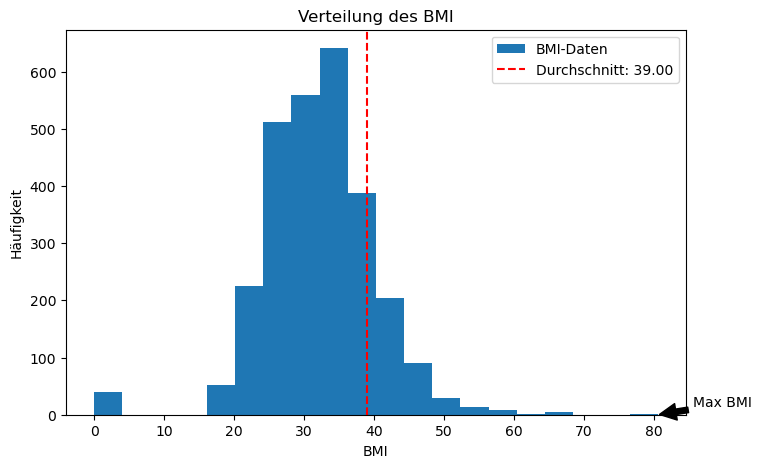

In [38]:
plt.figure(figsize=(8, 5))
df["BMI"].plot(kind='hist', bins=20)

plt.title('Verteilung des BMI')
plt.xlabel('BMI')
plt.ylabel('Häufigkeit')
plt.axvline(unrealistic_bmi_count, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {unrealistic_bmi_count:.2f}")
plt.legend(['BMI-Daten'], loc='upper right')
plt.legend(['BMI-Daten', f"Durchschnitt: {unrealistic_bmi_count:.2f}"], loc='upper right')

plt.annotate('Max BMI', xy=(df["BMI"].max(), 0), xytext=(df["BMI"].max() + 5, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


Die Analyse des Diagramms zeigt, dass es im Datensatz einige Einträge gibt, bei denen der BMI-Wert auf Null gesetzt ist. Diese Null-Werte deuten darauf hin, dass der BMI für diese Patienten nicht erfasst wurde, was den Durchschnittswert verfälscht. Es handelt sich um 39 Patienten, bei denen der BMI fehlt und daher als Null angegeben ist. Wenn diese 39 Patienten aus der Berechnung des Durchschnitts ausgeschlossen werden, ergibt sich ein korrigierter Durchschnitt von 32,5966, der den tatsächlichen BMI der restlichen Patienten genauer widerspiegelt.


In [43]:
unrealistic_bmi_count = (df["BMI"] == 0).sum()
clean_bmi_mean = df.loc[df["BMI"] != 0, "BMI"].mean()

print(f"Anzahl unrealistischer BMI-Werte: {unrealistic_bmi_count}")
print(f"Bereinigter BMI-Durchschnitt: {clean_bmi_mean:.2f}")

Anzahl unrealistischer BMI-Werte: 39
Bereinigter BMI-Durchschnitt: 32.60


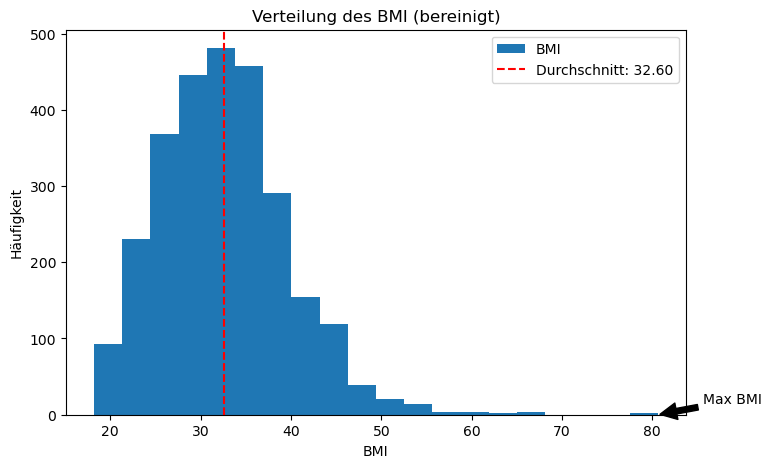

In [29]:
plt.figure(figsize=(8, 5))
df.loc[df["BMI"] != 0, "BMI"].plot(kind='hist', bins=20)

plt.title('Verteilung des BMI (bereinigt)')
plt.xlabel('BMI')
plt.ylabel('Häufigkeit')
plt.axvline(clean_bmi_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_bmi_mean:.2f}")
plt.annotate('Max BMI', xy=(df["BMI"].max(), 0), xytext=(df["BMI"].max() + 5, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc='upper right')
plt.show()

### 3.2 Blutdruck 

Der durchschnittliche Blutdruck im Datensatz liegt bei 72,40 mmHg. Wahrscheinlich handelt es sich bei diesen Werten um diastolische Blutdruckwerte. Es ist jedoch wichtig zu beachten, dass dieser Durchschnitt auch Blutdruckwerte von 0 mmHg umfasst, die im Datensatz als fehlende Werte für die entsprechenden Patienten interpretiert werden. 

Diese Null-Werte verzerren den Durchschnitt. Im folgenden Diagramm wurden die Null-Werte entfernt, um eine genauere Darstellung des tatsächlichen durchschnittlichen Blutdrucks der Patienten zu ermöglichen.

In [10]:
df[df["BloodPressure"] != 0]["BloodPressure"].mean()
print("Blutdruck Durchschnitt: ",df[df["BloodPressure"] != 0]["BloodPressure"].mean())

Blutdruck Durchschnitt:  72.40408626560726


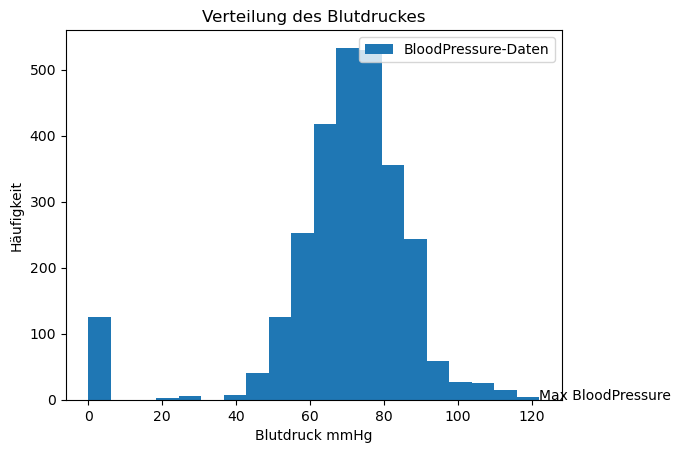

In [11]:
df["BloodPressure"].plot(kind='hist', bins=20)

plt.title('Verteilung des Blutdruckes')
plt.xlabel('Blutdruck mmHg')
plt.ylabel('Häufigkeit')
plt.legend(['BloodPressure-Daten'], loc='upper right')
plt.annotate('Max BloodPressure', xy=(df["BloodPressure"].max(), 0))

plt.show()

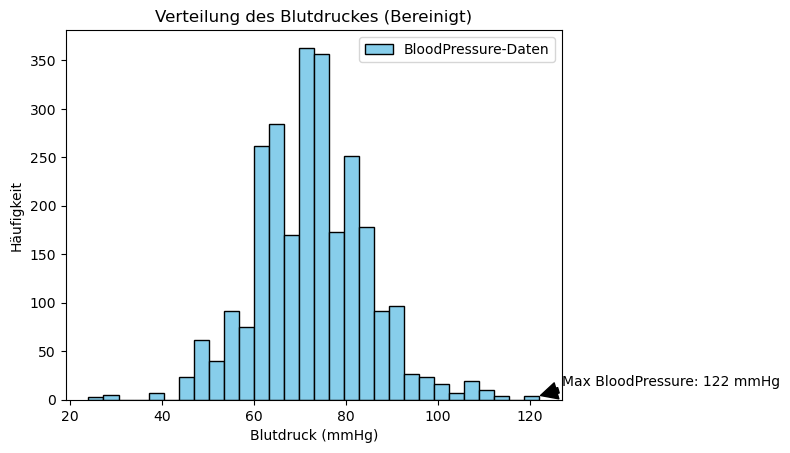

In [12]:
# Entferne Zeilen mit Blutdruckwerten von 0
df_cleaned = df[df["BloodPressure"] > 0]

# Blutdruck Histogramm plotten
df_cleaned["BloodPressure"].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')

# Titel und Achsenbeschriftungen
plt.title('Verteilung des Blutdruckes (Bereinigt)')
plt.xlabel('Blutdruck (mmHg)')
plt.ylabel('Häufigkeit')

# Maximalen Blutdruck und Häufigkeit berechnen
max_bp = df_cleaned["BloodPressure"].max()
max_bp_freq = df_cleaned["BloodPressure"].value_counts().loc[max_bp]

# Annotiere den maximalen Blutdruck-Wert
plt.annotate(f'Max BloodPressure: {max_bp} mmHg', 
             xy=(max_bp, max_bp_freq), 
             xytext=(max_bp + 5, max_bp_freq + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

# Legende hinzufügen
plt.legend(['BloodPressure-Daten'], loc='upper right')

# Plot anzeigen
plt.show()


### 3.3 Alter
Das Durchschnittsalter der Patienten im Datensatz beträgt 33 Jahre. Dieser Wert wird jedoch durch eine relativ hohe Anzahl sehr junger Patienten beeinflusst, die den Altersdurchschnitt deutlich nach unten ziehen. Es ist daher zu beachten, dass viele der Patienten in diesem Datensatz jünger sind, was den Durchschnittswert verzerrt und möglicherweise nicht das typische Alter für Diabetes-Risiken widerspiegelt.

In [13]:
df[df["Age"] != 0]["Age"].mean()

print("Alters Durchschnitt: ",df[df["Age"] != 0]["Age"].mean())

Alters Durchschnitt:  33.13222543352601


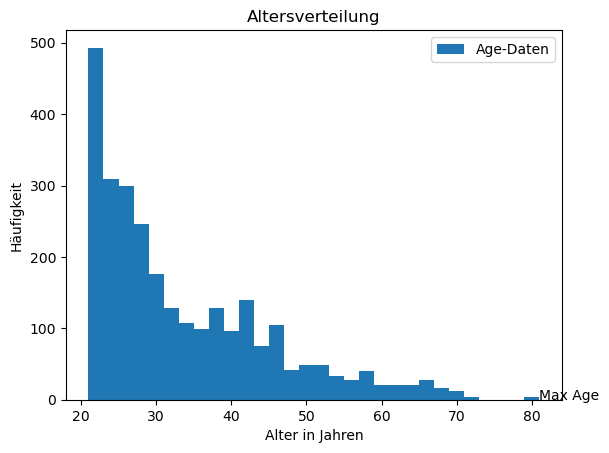

In [14]:
df["Age"].plot(kind='hist', bins=30)

plt.title('Altersverteilung')
plt.xlabel('Alter in Jahren')
plt.ylabel('Häufigkeit')
plt.legend(['Age-Daten'], loc='upper right')
plt.annotate('Max Age', xy=(df["Age"].max(), 0))
plt.show()

### 3.4 Resultate

In den Patientendaten haben 34,4% der Patienten Diabetes, während 65,6% der Patienten keinen Diabetes haben. Diese Verteilung zeigt, dass ein erheblicher Teil der Patienten im Datensatz an Diabetes leidet, was darauf hindeutet, dass viele der im Datensatz enthaltenen Personen Risikofaktoren für die Krankheit aufweisen. Die restlichen 65,6% ohne Diabetes bieten einen wertvollen Vergleich, um Risikofaktoren und mögliche Präventionsstrategien zu analysieren.

In [15]:
def sum_of_positive ():
    positive = 0
    for result in df["Outcome"]:
        if result == 1:
            positive = positive + 1
    return positive

nr_of_positives = sum_of_positive()
total_outcomes = len(df["Outcome"])
precentage_positive = (nr_of_positives/total_outcomes)*100

print(precentage_positive)


34.39306358381503


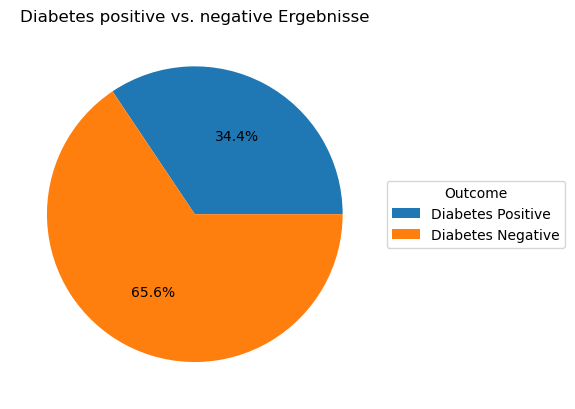

In [16]:
labels = "Diabetes Positive", "Diabetes Negative"
sizes = [nr_of_positives, total_outcomes - nr_of_positives]
fig,ax = plt.subplots()
ax.pie(sizes, autopct="%1.1f%%")

ax.legend(labels, title = "Outcome", loc= "center left", bbox_to_anchor=(1,0.5))
ax.set_title("Diabetes positive vs. negative Ergebnisse")

plt.show()


## 4. Zweites Datenset

### 4.1 Quelle

https://ourworldindata.org/grapher/diabetes-prevalence

### 4.2 Daten beschaffen und laden

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


In [18]:
data_worldwide = pd.read_csv('data/diabetes-prevalence.csv')

## 5. Datenvorbereitung

### 5.1 Beschreibung
Die Datenquelle enthält Informationen zur weltweiten Prävalenz von Diabetes in der Bevölkerung, wobei die Daten nach Ländern und Jahren unterteilt sind. Sie bieten einen Überblick darüber, wie sich die Diabetesraten über die Jahre entwickelt haben und ermöglichen Vergleiche zwischen verschiedenen Regionen und Zeiträumen. 

In [19]:
data_worldwide.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79)
0,Afghanistan,AFG,2011,7.6
1,Afghanistan,AFG,2021,10.9
2,Albania,ALB,2011,2.8
3,Albania,ALB,2021,10.2
4,Algeria,DZA,2011,7.0


## 6. Rohdatenanalyse

In [20]:
num_records = df.shape[0]
print(f"Anzahl der Datensätze: {num_records}")

Anzahl der Datensätze: 2768


In [21]:
data_worldwide.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Diabetes prevalence (% of population ages 20 to 79)    float64
dtype: object

### 6.1 Prävalenz

In [22]:
# Daten für das Jahr 2021 filtern
world_2021_df = data_worldwide[data_worldwide["Year"] == 2021]

# Durchschnittliche Prävalenz für 2021 berechnen
worldwide_2021_mean = world_2021_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (Weltweit, 2021):", worldwide_2021_mean)

# Daten für das Jahr 2011 filtern
world_2011_df = data_worldwide[data_worldwide["Year"] == 2011]

# Durchschnittliche Prävalenz für 2011 berechnen
worldwide_2011_mean = world_2011_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (Weltweit, 2011):", worldwide_2011_mean)

# Unterschied der Prävalenz zwischen 2011 und 2021 berechnen
prevalence_difference = worldwide_2021_mean - worldwide_2011_mean
print("Unterschied der Prävalenz zwischen 2021 und 2011: {:.2f}%".format(prevalence_difference))


Durchschnittliche Prävalenz in % (Weltweit, 2021): 9.035508633628316
Durchschnittliche Prävalenz in % (Weltweit, 2011): 8.014300144748859
Unterschied der Prävalenz zwischen 2021 und 2011: 1.02%


#### Prävalenz USA 2021

In [23]:
us_2021_df = data_worldwide[(data_worldwide["Code"] == "USA") & (data_worldwide["Year"] == 2021)]

us_2021_mean = us_2021_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (USA, 2021):", us_2021_mean)

us_2011_df = data_worldwide[(data_worldwide["Code"] == "USA") & (data_worldwide["Year"] == 2011)]

us_2011_mean = us_2011_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (USA, 2011):", us_2011_mean)

prevalence_difference_us = us_2021_mean - us_2011_mean
print("Unterschied der Prävalenz zwischen 2021 und 2011 (USA): {:.2f}%".format(prevalence_difference_us))


Durchschnittliche Prävalenz in % (USA, 2021): 10.7
Durchschnittliche Prävalenz in % (USA, 2011): 9.4
Unterschied der Prävalenz zwischen 2021 und 2011 (USA): 1.30%


##  7. Analyse

Die Analyse zeigt, dass personen mit einem positiven Diabetes Ergebnis einen stark erhöhten BMI aufweisen. Es sind alle übergewichtig bis auf 3% und 21% sind soger schwerwigend Übergewichtig. 
Jedoch muss gesagt werden zu unserem Ergebniss, dass unser Durchschitts BMI bereits bei 33 was bedeuted, dass die Patienten allgemein übergewichtig sind. Jeodch können unsere Zahlen doch einen erhöhten BMI bei den Diabetes Positiven feststellen.

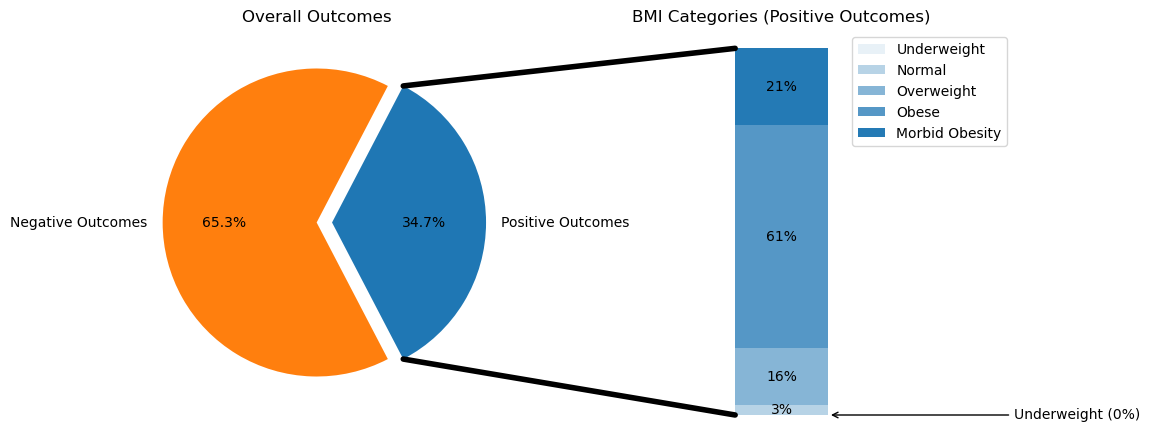

In [24]:

df_non_zero = df[df['BMI'] > 0]

positive_count = (df_non_zero['Outcome'] == 1).sum()
negative_count = (df_non_zero['Outcome'] == 0).sum()
total = positive_count + negative_count

positive_ratio = positive_count / total
negative_ratio = negative_count / total

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 40:
        return 'Obese'
    else:
        return 'Morbid Obesity'

positive_df = df_non_zero[df_non_zero['Outcome'] == 1].copy()
positive_df['BMI_Category'] = positive_df['BMI'].apply(get_bmi_category)

bmi_counts = positive_df['BMI_Category'].value_counts()
bmi_ratios = bmi_counts / bmi_counts.sum()

bmi_categories_order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbid Obesity']
bmi_ratios_ordered = [bmi_ratios.get(cat, 0) for cat in bmi_categories_order]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0)

labels = ['Positive Outcomes', 'Negative Outcomes']
ratios = [positive_ratio, negative_ratio]
explode = [0.1, 0]
angle = -180 * ratios[0]

wedges, *_ = ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['C0', 'C1'])
ax1.set_title("Overall Outcomes")

width = 0.2
bottom = 0

for j, (height, category) in enumerate(zip(bmi_ratios_ordered, bmi_categories_order)):
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0',
                 alpha=0.1 + 0.22 * j, label=category)
    label_text = f"{category} ({height:.0%})"
    bar_center = bottom + height / 2.0
    
    if height < 0.02:
        ax2.annotate(
            label_text,                      
            xy=(0 + width/2, bar_center),    
            xytext=(0.5, bar_center),        
            arrowprops=dict(arrowstyle="->", lw=1),
            va='center'
        )
    else:
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
    bottom += height

ax2.set_title("BMI Categories (Positive Outcomes)")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

positive_wedge = wedges[0]
theta1, theta2 = positive_wedge.theta1, positive_wedge.theta2
center, r = positive_wedge.center, positive_wedge.r
bar_height = sum(bmi_ratios_ordered)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [25]:

positive_df = df[df['Outcome'] == 1]
negative_df = df[df['Outcome'] == 0]

positive_mean = positive_df[['BMI', 'Glucose', 'BloodPressure', 'Age']].mean()
negative_mean = negative_df[['BMI', 'Glucose', 'BloodPressure', 'Age']].mean()

print("Durchschnittswerte für Diabetes-positive Patienten:\n", positive_mean)
print("\nDurchschnittswerte für Diabetes-negative Patienten:\n", negative_mean)

Durchschnittswerte für Diabetes-positive Patienten:
 BMI               35.270378
Glucose          141.481092
BloodPressure     71.070378
Age               36.987395
dtype: float64

Durchschnittswerte für Diabetes-negative Patienten:
 BMI               30.494989
Glucose          110.419604
BloodPressure     68.119493
Age               31.111233
dtype: float64


In [26]:

def calculate_diabetes_risk_index(row):
    
    bmi_weight = 0.4
    bp_weight = 0.2
    glucose_weight = 0.2
    age_weight = 0.1
    pregnancies_weight = 0.1

    
    bmi = row['BMI']
    blood_pressure = row['BloodPressure']
    glucose = row['Glucose']
    age = row['Age']
    pregnancies = row['Pregnancies']

    
    if bmi >= 30:
        bmi_risk = 1  
    elif bmi >= 25:
        bmi_risk = 0.75  
    else:
        bmi_risk = 0.5  

    
    if blood_pressure > 130:
        bp_risk = 1
    elif blood_pressure > 120:
        bp_risk = 0.75
    else:
        bp_risk = 0.5

    
    if glucose >= 126:
        glucose_risk = 1
    elif glucose >= 100:
        glucose_risk = 0.75
    else:
        glucose_risk = 0.5

    
    if age >= 60:
        age_risk = 1
    elif age >= 45:
        age_risk = 0.75
    else:
        age_risk = 0.5

    
    if pregnancies >= 3:
        pregnancies_risk = 1
    else:
        pregnancies_risk = 0.5

    
    risk_index = (bmi_risk * bmi_weight + 
                  bp_risk * bp_weight + 
                  glucose_risk * glucose_weight + 
                  age_risk * age_weight + 
                  pregnancies_risk * pregnancies_weight)
    
    return risk_index


df['Diabetes_Risk_Index'] = df.apply(calculate_diabetes_risk_index, axis=1)


print(df[['BMI', 'BloodPressure', 'Glucose', 'Age', 'Pregnancies', 'Diabetes_Risk_Index']].head())


    BMI  BloodPressure  Glucose  Age  Pregnancies  Diabetes_Risk_Index
0  33.6             72      148   50            6                0.875
1  26.6             66       85   31            1                0.600
2  23.3             64      183   32            8                0.650
3  28.1             66       89   21            1                0.600
4  43.1             40      137   33            0                0.800
